# Assignment-4

Q.1

In [13]:
def random_numbers(m,mod,seed,n):
    random_numbers = []
    current_seed = seed
    for _ in range(n):
        current_seed = (m * current_seed) % mod
        random_numbers.append(current_seed / mod)
    return random_numbers

In [14]:
#a
a = 65
m = 1021
num = random_numbers(a,m, 5, 10)
print("Random numbers (multiplier=65, modulus=1021):", num)


#b
a = 572
m = 16381
num = random_numbers(a,m, 8, 10)
print("Random numbers (multiplier=572, modulus=16381):", num)

Random numbers (multiplier=65, modulus=1021): [0.31831537708129287, 0.6904995102840352, 0.8824681684622919, 0.3604309500489716, 0.42801175318315376, 0.8207639569049952, 0.34965719882468166, 0.7277179236043095, 0.30166503428011754, 0.6082272282076395]
Random numbers (multiplier=572, modulus=16381): [0.2793480251510897, 0.7870703864232953, 0.2042610341249008, 0.8373115194432574, 0.9421891215432513, 0.9321775227397595, 0.2055430071424211, 0.5706000854648678, 0.3832488859044014, 0.21836273731762407]


Q.2

C:\Users\soham\AppData\Local\Temp\ipykernel_5224\4051118499.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


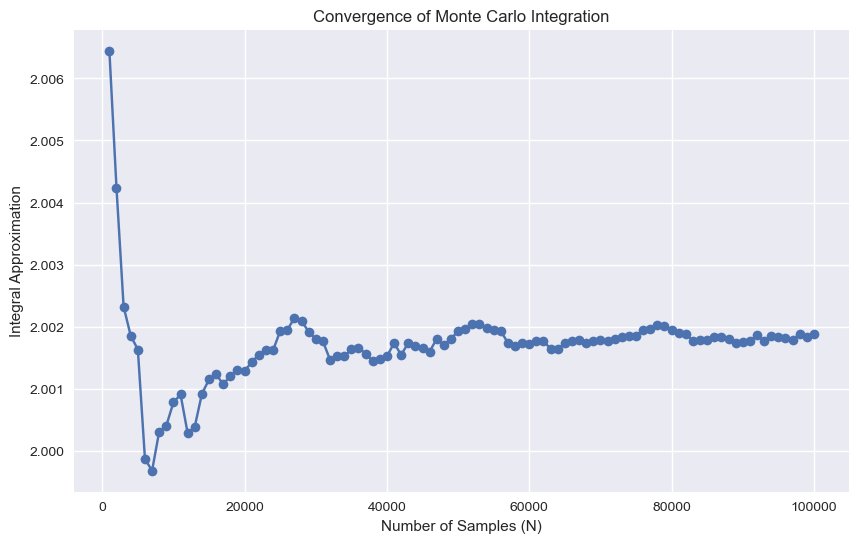

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('seaborn')

# Parameters for the pseudo-random number generator (pRNG)
multiplier = 65
modulus = 1021

def generate_random_numbers(seed, num_numbers, multiplier, modulus):
    random_numbers = []
    current_seed = seed
    for _ in range(num_numbers):
        current_seed = (multiplier * current_seed) % modulus
        random_numbers.append(current_seed / modulus)
    return random_numbers

def monte_carlo_integration(N, multiplier, modulus):
    integral_values = []
    for n in range(1000, N + 1, 1000):
        random_numbers = generate_random_numbers(seed=7, num_numbers=n, multiplier=multiplier, modulus=modulus)
        integral_approximation = np.mean(np.cos(np.pi * np.array(random_numbers) - np.pi/2))
        integral_values.append(integral_approximation * np.pi)
    return integral_values

# Calculate integral approximation for different N values
N_values = range(1000, 100001, 1000)
integral_values = monte_carlo_integration(100000, multiplier, modulus)

# Plot the convergence
plt.figure(figsize=(10, 6))
plt.plot(N_values, integral_values, marker='o', linestyle='-')
plt.title('Convergence of Monte Carlo Integration')
plt.xlabel('Number of Samples (N)')
plt.ylabel('Integral Approximation')
plt.grid(True)
plt.show()


Q.3

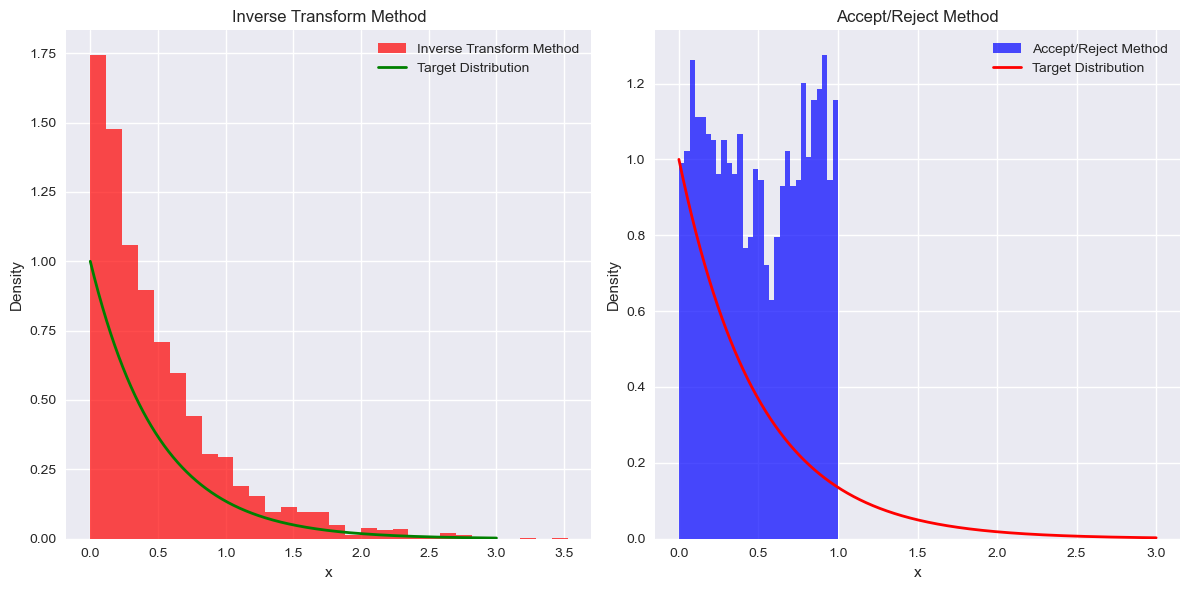

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target distribution function
def target_distribution(x):
    return np.exp(-2 * x)

# Define the sampling distribution function (q(x))
def sampling_distribution(x):
    return 1 - x

# Inverse Transform Method
def inverse_transform_method(num_samples):
    u = np.random.uniform(0, 1, num_samples)
    x_inverse = -np.log(1 - u) / 2
    return x_inverse

# Accept/Reject Method
def accept_reject_method(num_samples):
    samples = []
    while len(samples) < num_samples:
        x = np.random.uniform(0, 1)
        u = np.random.uniform(0, 1)
        if u < target_distribution(x) / sampling_distribution(x):
            samples.append(x)
    return np.array(samples)

# Generate random numbers using both methods
num_samples = 2000
samples_inverse_transform = inverse_transform_method(num_samples)
samples_accept_reject = accept_reject_method(num_samples)

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(samples_inverse_transform, bins=30, density=True, alpha=0.7, color='r', label='Inverse Transform Method')
x_values = np.linspace(0, 3, 1000)
plt.plot(x_values, target_distribution(x_values), 'g-', linewidth=2, label='Target Distribution')
plt.title('Inverse Transform Method')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(samples_accept_reject, bins=30, density=True, alpha=0.7, color='b', label='Accept/Reject Method')
plt.plot(x_values, target_distribution(x_values), 'r-', linewidth=2, label='Target Distribution')
plt.title('Accept/Reject Method')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


Q.4

Integral estimate with p1(x): 0.7987718832262001
Variance reduction with p1(x): 0.02961561627234008

Integral estimate with p2(x): 0.6010843236171453
Variance reduction with p2(x): 0.000655138649495829

Integral estimate with p3(x): 0.3830804491115849
Variance reduction with p3(x): 0.05934074119303755


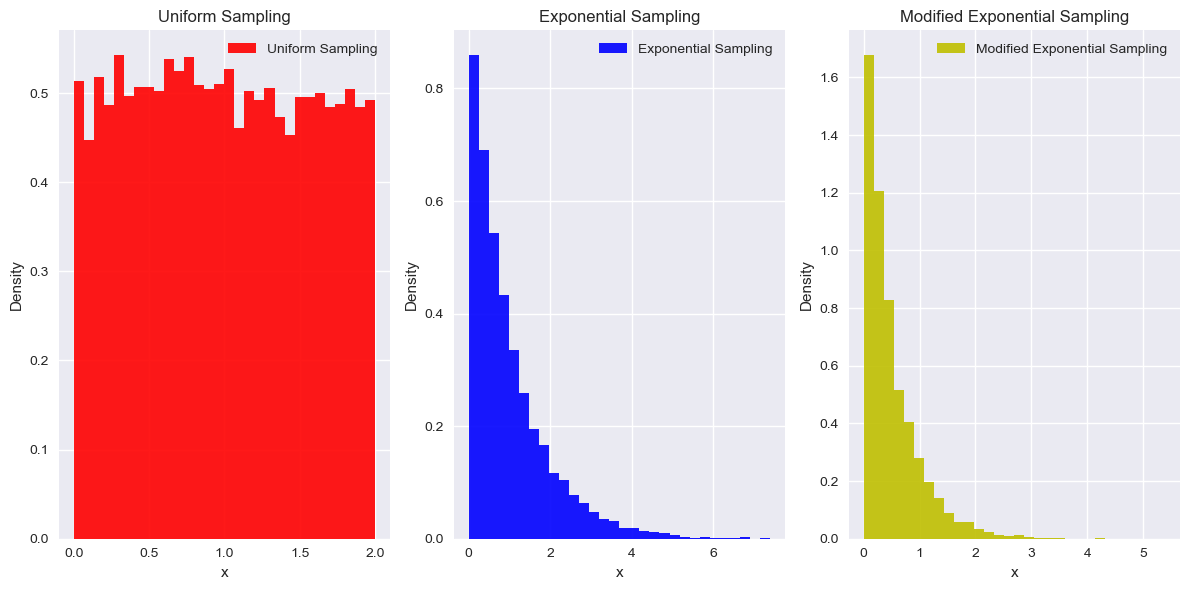

In [11]:
# Define the integrand function
def integrand(x):
    return np.exp(-2 * x) / (1 + x**2)

# Define the importance sampling functions and their respective ranges
def p1(x):
    return np.where((0 <= x) & (x <= 2), 0.5, 0)

def p2(x):
    return np.where(x > 0, np.exp(-x), 0)

def p3(x):
    return np.where((0 <= x) & (x <= 2), np.exp(-x / 2) / (2 * (1 - np.exp(-1 / 2))), 0)

# Monte Carlo integration with importance sampling
def monte_carlo_integration(num_samples, importance_sampling_function):
    samples = np.random.uniform(0, 2, num_samples)  # Sample from the interval [0, 2]
    integrand_values = integrand(samples) / importance_sampling_function(samples)
    integral_estimate = np.mean(integrand_values) * 2  # Interval [0, 2]
    return integral_estimate

# Number of samples
N = 10000

# Calculate integral estimates using different importance sampling functions
integral_estimate_p1 = monte_carlo_integration(N, p1)
integral_estimate_p2 = monte_carlo_integration(N, p2)
integral_estimate_p3 = monte_carlo_integration(N, p3)

# True value of the integral (approximated using numerical methods)
true_integral = 0.62668

# Calculate variance reduction achieved
variance_reduction_p1 = (integral_estimate_p1 - true_integral)**2
variance_reduction_p2 = (integral_estimate_p2 - true_integral)**2
variance_reduction_p3 = (integral_estimate_p3 - true_integral)**2

# Print results
print("Integral estimate with p1(x):", integral_estimate_p1)
print("Variance reduction with p1(x):", variance_reduction_p1)
print("\nIntegral estimate with p2(x):", integral_estimate_p2)
print("Variance reduction with p2(x):", variance_reduction_p2)
print("\nIntegral estimate with p3(x):", integral_estimate_p3)
print("Variance reduction with p3(x):", variance_reduction_p3)



plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(np.random.uniform(0, 2, N), bins=30, density=True, alpha=0.9, color='r', label='Uniform Sampling')
plt.title('Uniform Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(np.random.exponential(1, N), bins=30, density=True, alpha=0.9, color='b', label='Exponential Sampling')
plt.title('Exponential Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(np.random.exponential(0.5, N), bins=30, density=True, alpha=0.9, color='y', label='Modified Exponential Sampling')
plt.title('Modified Exponential Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()
